In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
train_data_file = "/Users/xiaohouzi/Desktop/industry_predict/zhengqi_train.txt"
test_data_file = "/Users/xiaohouzi/Desktop/industry_predict/zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

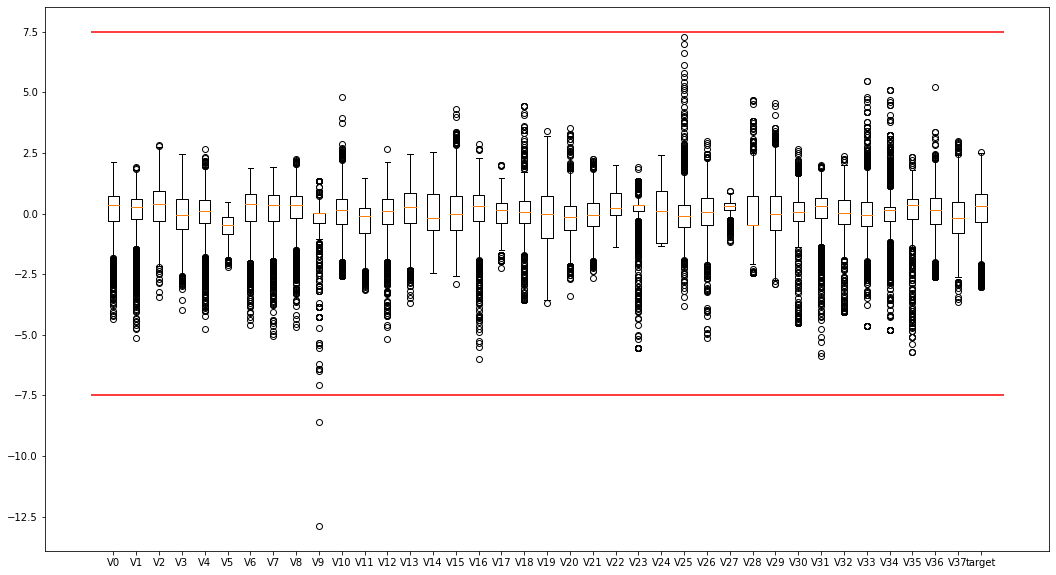

In [9]:
plt.figure(figsize=(18, 10))
plt.boxplot(x=train_data.values, labels=train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors='r')
plt.show()

In [10]:
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [32]:
from sklearn import preprocessing

features_columns = [col for col in train_data.columns if col not in ['target']]

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns
train_data_scaler['target'] = train_data['target']

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

In [33]:
train_data_scaler.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.759139,0.729830,0.524488,0.680337,0.698964,0.479596,0.427136,0.385874,0.613522,0.757557,...,0.406834,0.641467,0.666159,0.679280,0.00000,0.000000,0.074074,0.000000,0.018401,0.175
1,0.821406,0.789631,0.557939,0.705130,0.664244,0.482591,0.465152,0.385874,0.724232,0.757557,...,0.371596,0.643552,0.748349,0.721619,0.37495,0.499949,0.755580,0.289702,0.437406,0.676
2,0.828377,0.808239,0.584987,0.674567,0.653210,0.518532,0.495905,0.385874,0.733458,0.757557,...,0.387480,0.676487,0.779472,0.610577,0.37495,0.499949,0.755580,0.429901,0.458673,0.633
3,0.785006,0.779830,0.592670,0.642601,0.718746,0.562711,0.521712,0.425208,0.734467,0.757557,...,0.390683,0.684269,0.779726,0.722084,0.37495,0.477220,0.755580,0.374841,0.530618,0.206
4,0.777416,0.818182,0.588988,0.649462,0.683488,0.646949,0.541338,0.425208,0.721638,0.757557,...,0.413107,0.776126,0.785950,0.693393,0.37495,0.462067,0.755580,0.296712,0.543288,0.384


In [34]:
train_data_scaler.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.690528,0.735521,0.593745,0.606301,0.639876,0.607801,0.735418,0.741337,0.702012,0.894246,...,0.401715,0.634030,0.760517,0.631794,0.459255,0.484465,0.734850,0.336306,0.527854,0.126353
std,0.143747,0.133738,0.145844,0.151302,0.119550,0.193919,0.141872,0.137111,0.129082,0.067047,...,0.141644,0.125338,0.110903,0.139979,0.099782,0.101353,0.122917,0.123733,0.153423,0.983966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.625465,0.695419,0.497279,0.515165,0.586328,0.497566,0.659249,0.682314,0.653453,0.878743,...,0.300053,0.586993,0.722656,0.565408,0.409037,0.454490,0.684936,0.279760,0.427112,-0.350250
50%,0.727076,0.766264,0.609155,0.609933,0.652940,0.642456,0.767115,0.774045,0.728557,0.909110,...,0.385611,0.633755,0.782330,0.634615,0.454518,0.499949,0.755580,0.349860,0.519532,0.313000
75%,0.783922,0.812642,0.694342,0.714174,0.712185,0.759266,0.835613,0.836958,0.781029,0.909110,...,0.488154,0.694136,0.824949,0.714950,0.504261,0.511365,0.785260,0.414511,0.622210,0.793250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


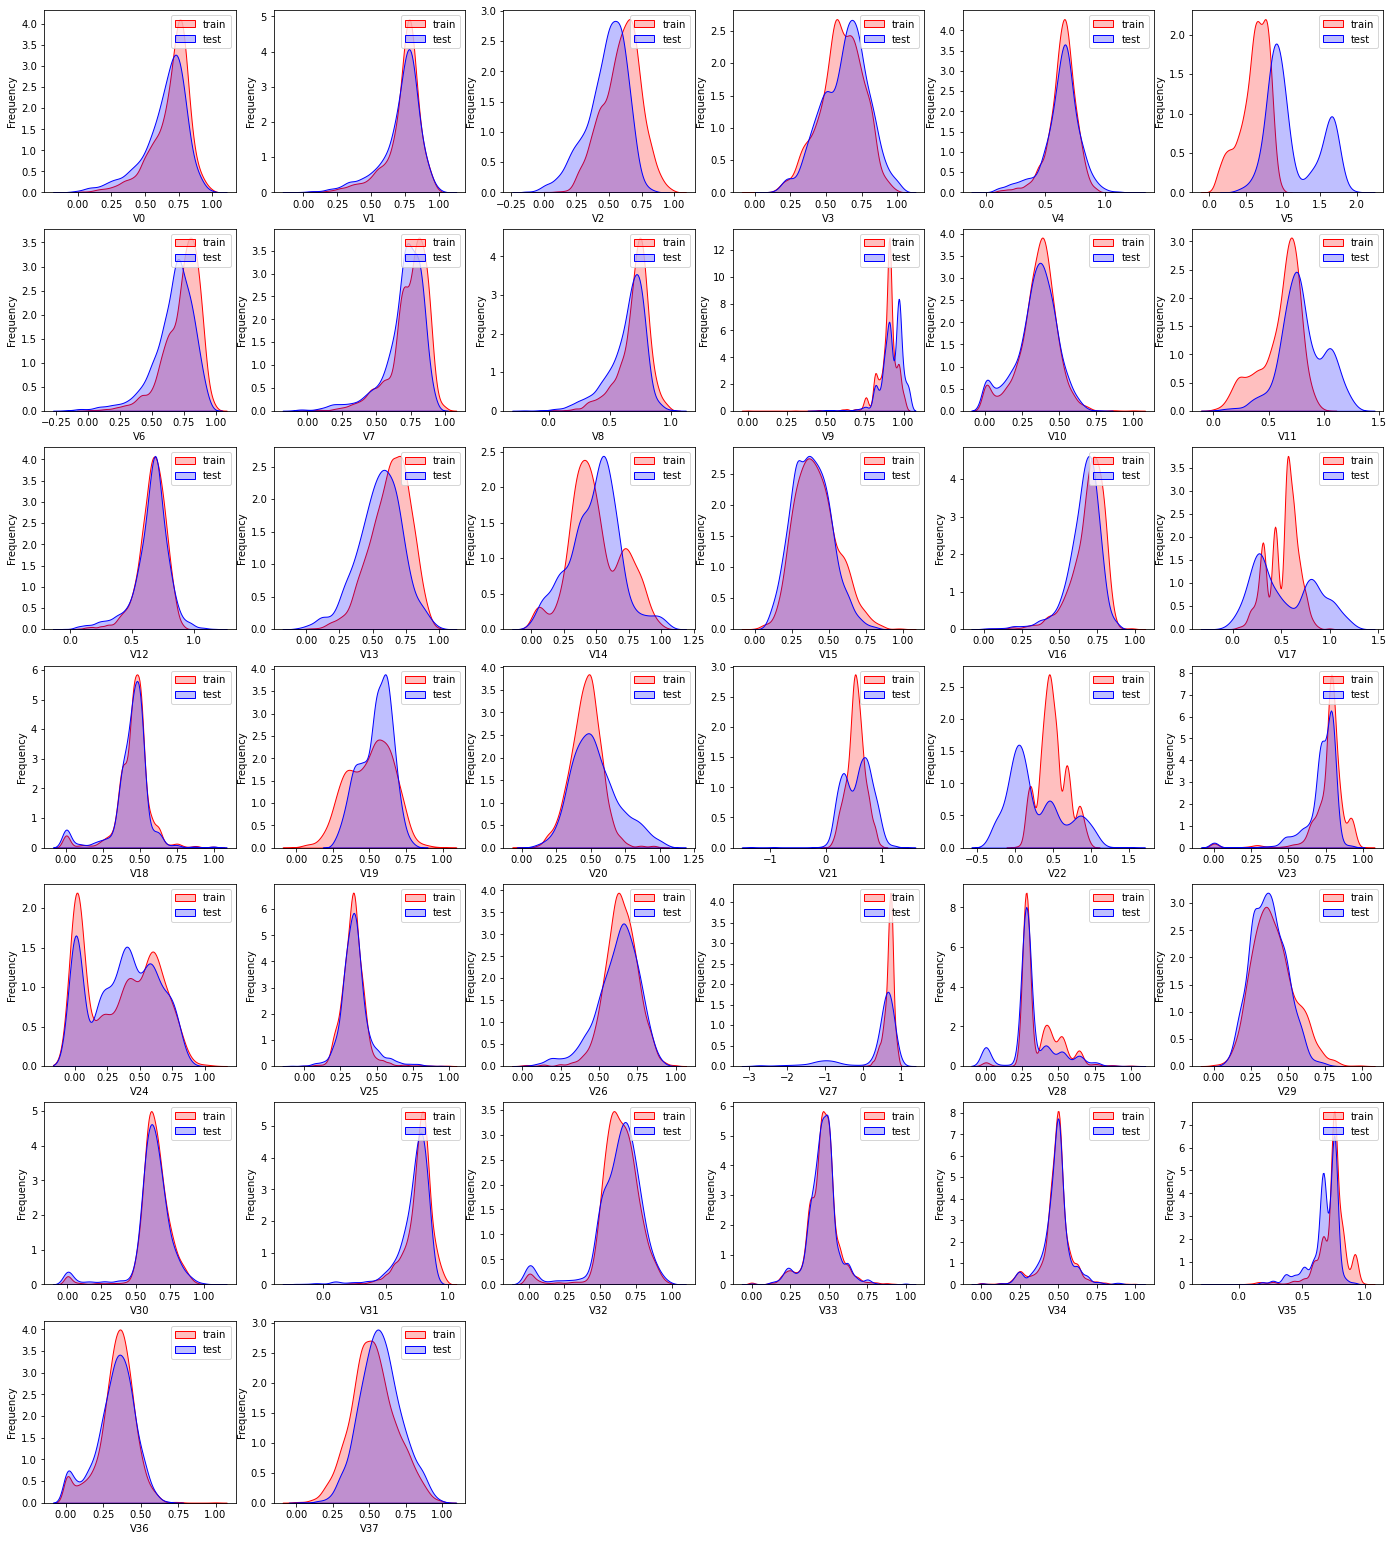

In [35]:
dist_cols = 6
dist_rows = len(test_data_scaler.columns)
plt.figure(figsize=(4*dist_cols, 4*dist_rows))

for i, col in enumerate(test_data_scaler.columns):
    ax = plt.subplot(dist_rows, dist_cols, i+1)
    ax = sns.kdeplot(train_data_scaler[col], color="red", shade=True)
    ax = sns.kdeplot(test_data_scaler[col], color="blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train", "test"])
    
plt.show()


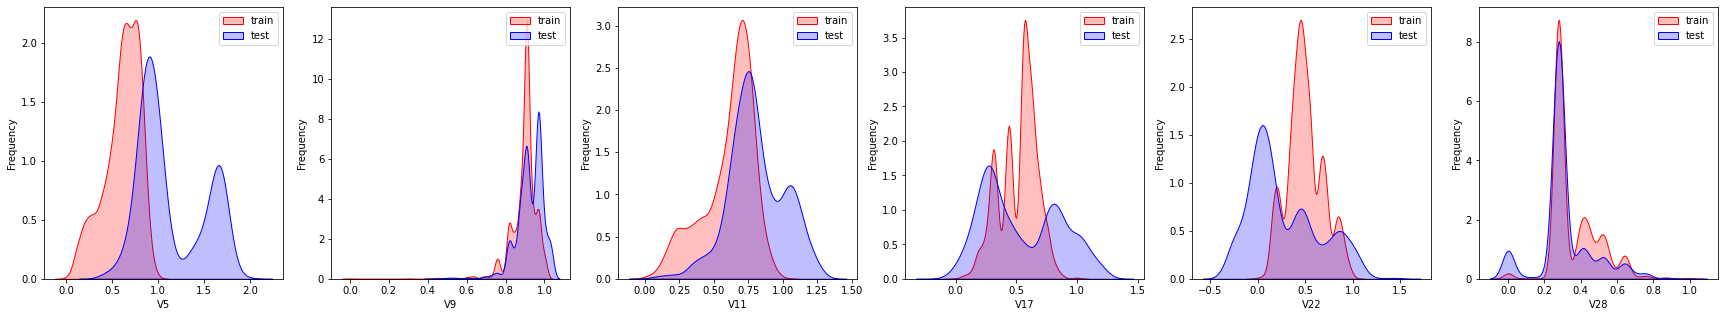

In [39]:
drop_col = 6
drop_row = 1

plt.figure(figsize=(5*drop_col, 5*drop_row))

for i, col in enumerate(["V5", "V9", "V11", "V17", "V22", "V28"]):
    ax = plt.subplot(drop_row, drop_col, i+1)
    ax = sns.kdeplot(train_data_scaler[col], color="red", shade=True)
    ax = sns.kdeplot(test_data_scaler[col], color="blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train", "test"])
    
plt.show()

通过查看特征'V5', 'V17', 'V28', 'V22', 'V11', 'V9'数据的数据分布，发现训练集的数据和测试集的数据分布不一致，会影响模型的泛化能力，故删除这些特征。

In [40]:
drop_columns = ['V5', 'V9', 'V11', 'V17', 'V22', 'V28']